In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

from tqdm import tqdm

In [2]:
import severability

In [3]:
G = nx.triangular_lattice_graph(10,10)
A = nx.to_numpy_array(G)
P = severability.transition_matrix(A)

In [4]:
np.sum(P,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
np.sum(P,axis=1)

array([0.45      , 1.11666667, 0.83333333, 0.83333333, 0.91666667,
       0.75      , 1.41666667, 1.2       , 1.16666667, 1.16666667,
       1.45      , 0.7       , 0.56666667, 1.23333333, 1.        ,
       1.        , 1.03333333, 1.16666667, 1.16666667, 1.03333333,
       1.        , 1.        , 1.23333333, 0.56666667, 0.56666667,
       1.23333333, 1.        , 1.        , 1.03333333, 1.16666667,
       1.16666667, 1.03333333, 1.        , 1.        , 1.23333333,
       0.56666667, 0.56666667, 1.23333333, 1.        , 1.        ,
       1.03333333, 1.16666667, 1.16666667, 1.03333333, 1.        ,
       1.        , 1.23333333, 0.56666667, 0.56666667, 1.23333333,
       1.        , 1.        , 1.03333333, 1.16666667, 1.41666667,
       1.2       , 1.16666667, 1.16666667, 1.45      , 0.7       ,
       0.45      , 1.11666667, 0.83333333, 0.83333333, 0.91666667,
       0.75      ])

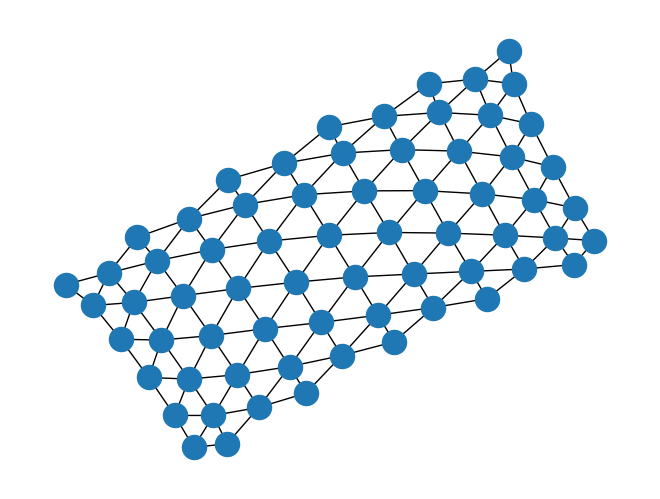

In [6]:
nx.draw(G)

In [7]:
times = np.arange(1,10,1)
n_communities = np.zeros_like(times)
s_communities = np.zeros_like(times)

for i in tqdm(range(len(times))):
    t = times[i]
    partition = severability.component_cover(P,t=t)
    n_communities[i] = len(partition)
    sizes = np.zeros(len(partition))
    for j in range((len(partition))):
        sizes[j] = len(partition[j][0])
    s_communities[i] = sizes.mean()
    

100%|██████████| 9/9 [00:14<00:00,  1.66s/it]


[Text(0.5, 0, 'time'), Text(0, 0.5, 'number communities')]

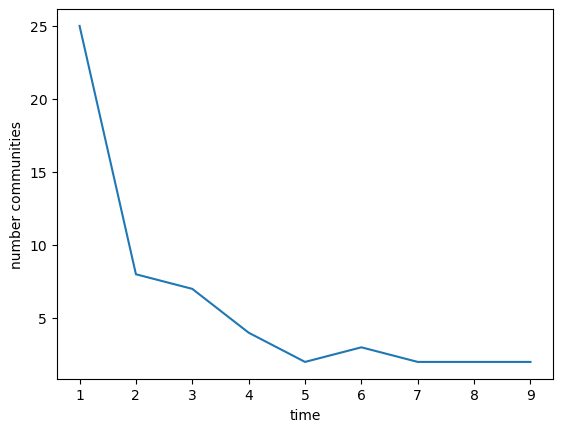

In [8]:
fig, ax = plt.subplots(1)
ax.plot(times,n_communities)
ax.set(xlabel="time", ylabel="number communities")

[Text(0.5, 0, 'time'), Text(0, 0.5, 'mean community size')]

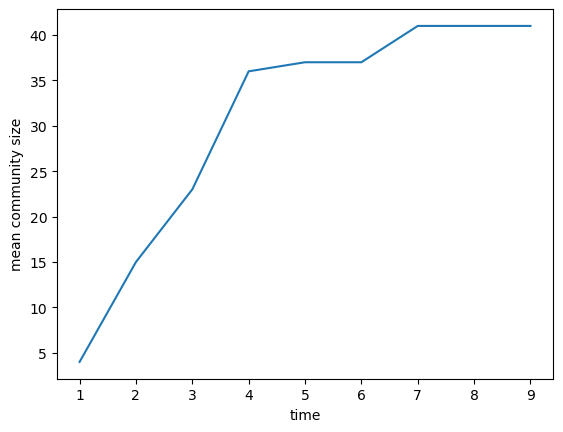

In [9]:
fig, ax = plt.subplots(1)
ax.plot(times,s_communities)
ax.set(xlabel="time", ylabel="mean community size")